# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

Approach:

1. Two Sample ttest will be appropriate for comparing new and old landing pages.
2. Two proportion Z test will be appropriate to check the mean conversion values for both the landing pages.
3. Chi Square test of independency will be appropriate to check the dependency.
4. ANOVA will help us comparing all three samples together.

## Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

## Reading the Data into a DataFrame

In [2]:
data = pd.read_csv("D:\\Abhishek Data\\ASUS Abhi\\Abhi\\Learning\\Great Learning\\Project 02 BS\\abtest.csv")

In [3]:
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
df.shape

(100, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df1= df[['landing_page','time_spent_on_the_page','converted','language_preferred']]
df1.groupby(['landing_page', 'converted']).sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15120\3417837687.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['landing_page', 'converted']).sum()


time_spent_on_the_page
landing_page converted                        
new          no                          83.00
             yes                        228.16
old          no                          97.13
             yes                        129.49

In [17]:
df1.groupby(['language_preferred']).sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15120\160425793.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['language_preferred']).sum()


,time_spent_on_the_page
language_preferred,
English,177.89
French,178.61
Spanish,181.28


In [25]:
df1.groupby(['language_preferred','converted']).sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4376\822414237.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['language_preferred','converted']).sum()


time_spent_on_the_page
language_preferred converted                        
English            no                          41.92
                   yes                        135.97
French             no                          73.37
                   yes                        105.24
Spanish            no                          64.84
                   yes                        116.44

In [26]:
df1['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [27]:
df1.groupby(['language_preferred'])['converted'].value_counts()

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: converted, dtype: int64

### Observations:

1. Sample is the collection of 100 rows and 6 columns.
2. Mean and median time_spent_on_the_page is 5.3778, 5.415 : We can say the graph is almost normally distributed
3. As per the data mentioned above we can say the conversion rate depends on time spend on the page.
4. Users spend more time on new landing page in comparision to old landing page.
5. E-News has 3 preferred languages with spanish and French as top two. But the conversion rate is better for English.(Maximum time spent on the page)

### Univariate Analysis

<Axes: xlabel='group', ylabel='Density'>

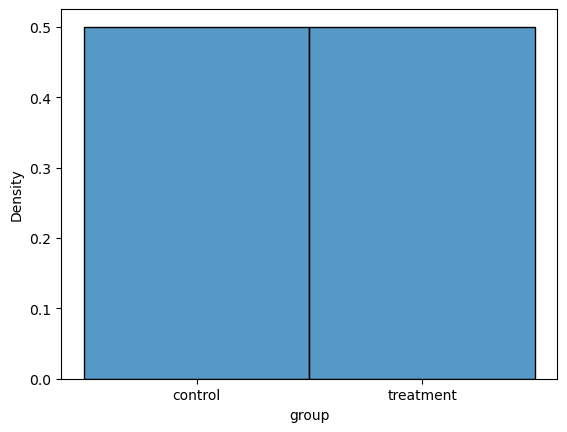

In [28]:
sns.histplot(df['group'], stat ='density')

### Observation: 
- 50% Values are under control group and 50% are under treatment group

<Axes: xlabel='landing_page', ylabel='Count'>

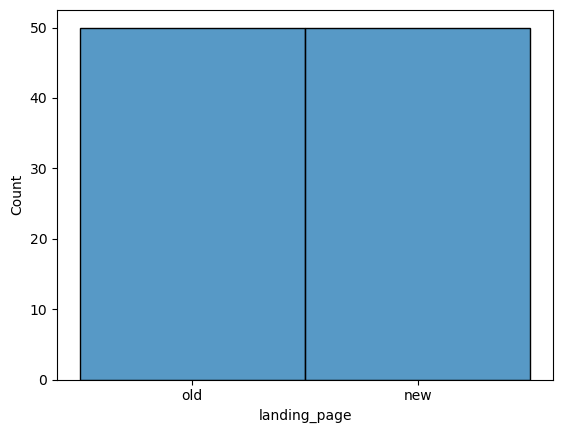

In [29]:
sns.histplot(df['landing_page'])

### Observation: 
- 50% Values are landing on old page and other 50% are landing on new page.

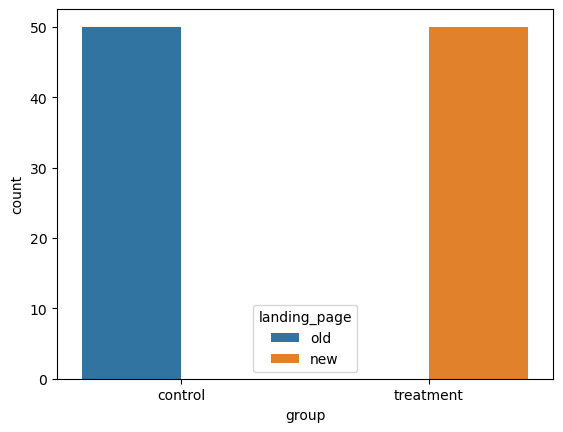

In [30]:
sns.countplot(data = df, x= 'group', hue = 'landing_page');

### Observations: 
The column control and treatment are related to each other as

1. All values under control group are belong to old landing page and vice-versa.
2. All values under treatment group are belong to new landing page and vice-versa.

In [31]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


(0.0, 10.0)

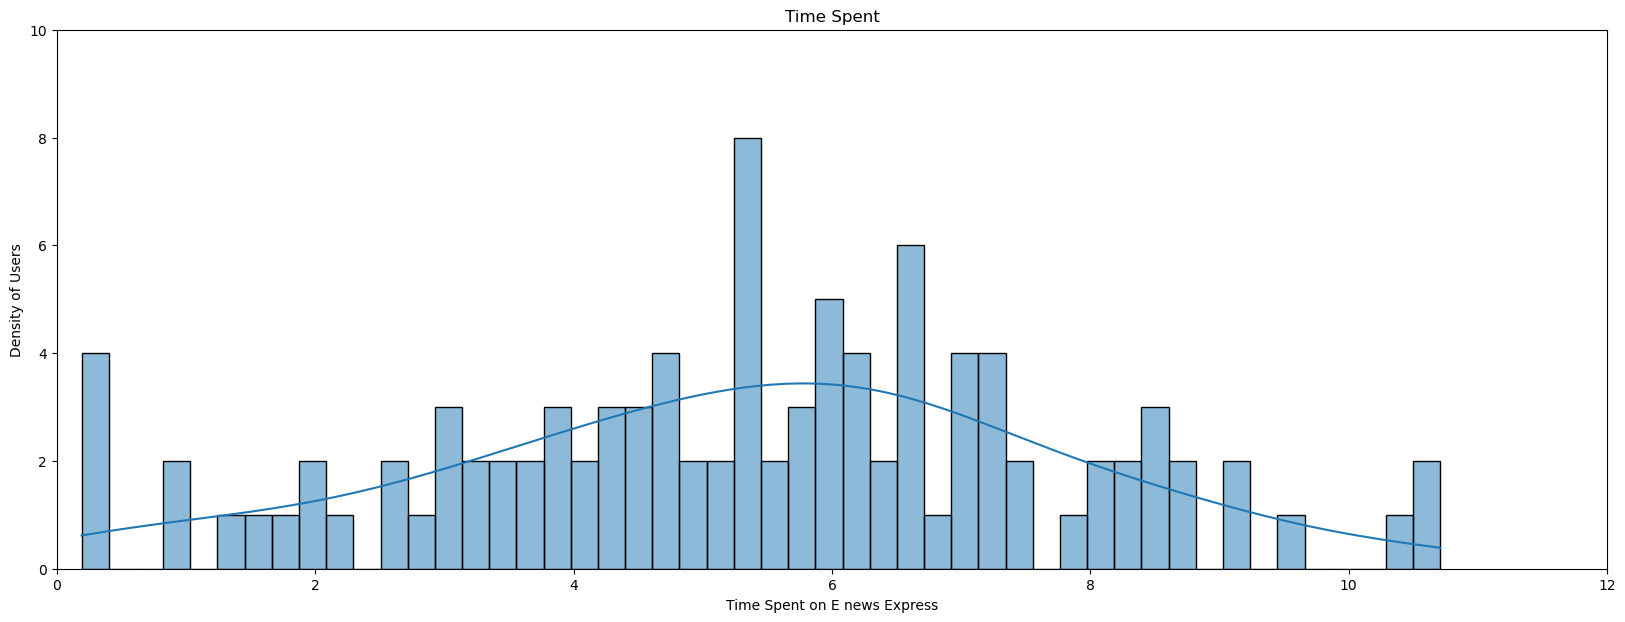

In [32]:
plt.figure(figsize = (20,7))
sns.histplot(df['time_spent_on_the_page'], bins = 50, kde = True, stat = 'count')
plt.title('Time Spent')
plt.xlabel('Time Spent on E news Express')
plt.ylabel('Density of Users')
plt.xlim(0,12)
plt.ylim(0,10)

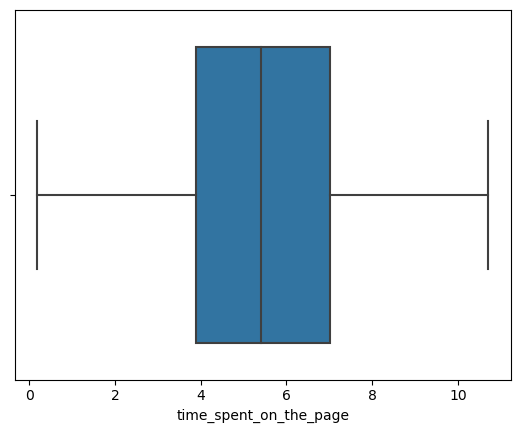

In [54]:
sns.boxplot(x = df['time_spent_on_the_page']);

### Observation: 
- There are no outliers in time spend on the page.

(0.0, 60.0)

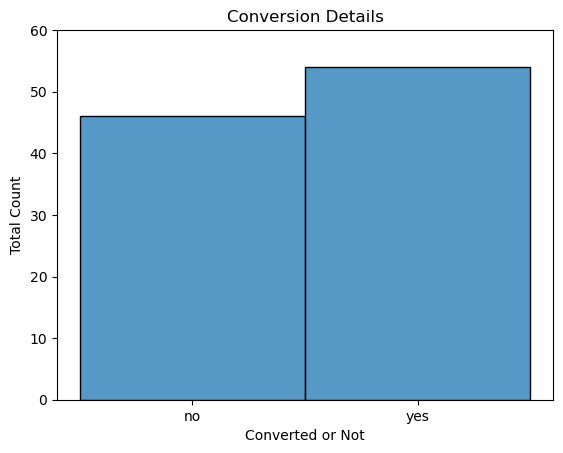

In [34]:
sns.histplot(df['converted'], stat = 'count')
plt.title('Conversion Details')
plt.xlabel('Converted or Not')
plt.ylabel('Total Count')
plt.ylim(0,60)

(0.0, 40.0)

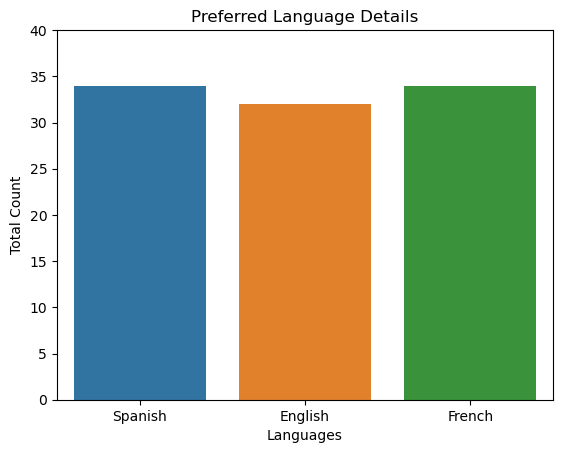

In [35]:
sns.countplot(data = df1, x = 'language_preferred')
plt.title('Preferred Language Details')
plt.xlabel('Languages')
plt.ylabel('Total Count')
plt.ylim(0,40)

### Observations:

1. There are no outliers in time_spend_on_the_page.
2. Total user subscription count is greater than the contrary part

(0.0, 200.0)

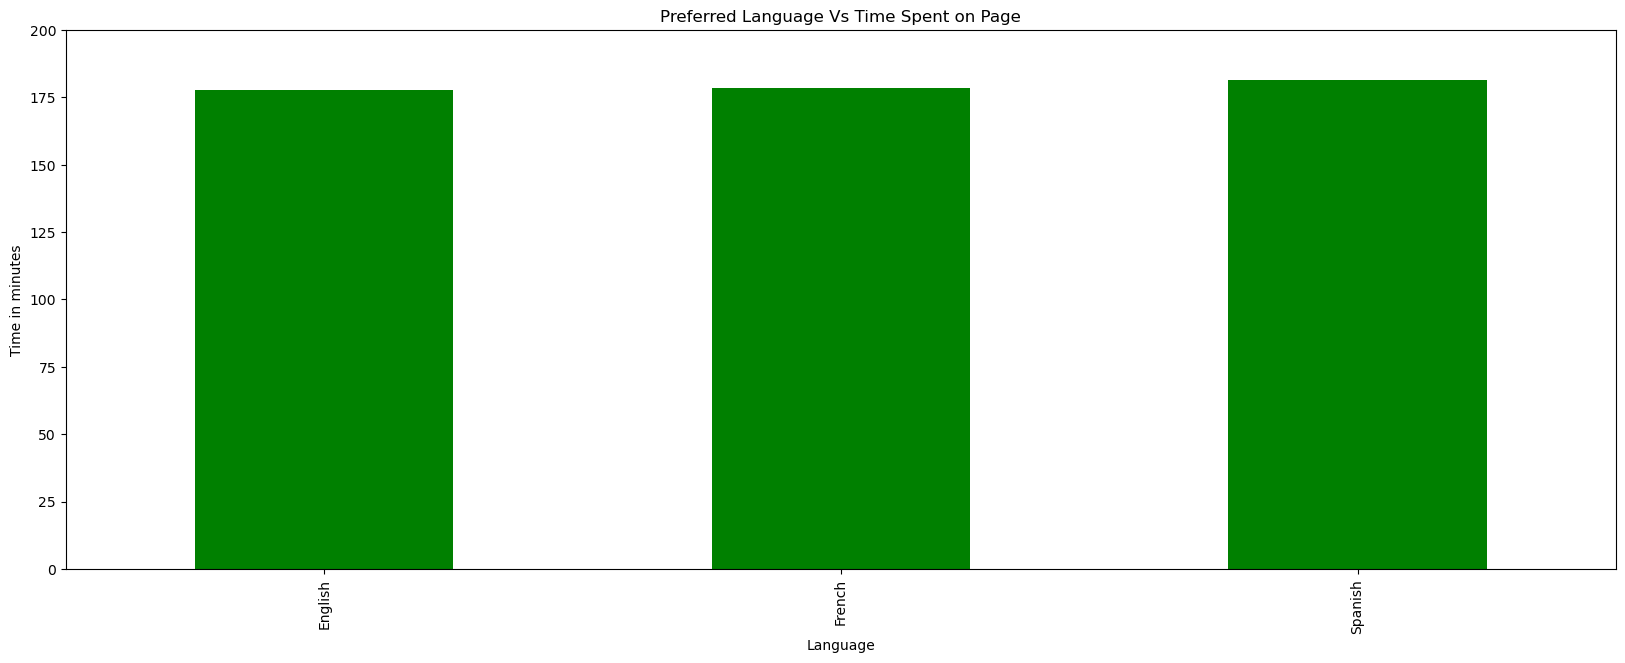

In [36]:
plt.figure(figsize = (20,7))
df.groupby(['language_preferred'])['time_spent_on_the_page'].sum().plot(kind = 'bar', color = 'g')
plt.title('Preferred Language Vs Time Spent on Page')
plt.ylabel('Time in minutes')
plt.xlabel('Language')
plt.ylim(0,200)

### Observation:

- Users of different language are spending almost same time.

### Bivariate Analysis

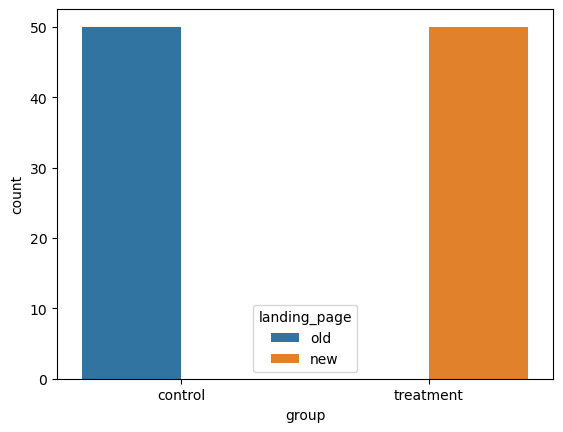

In [37]:
sns.countplot(data = df, x= 'group', hue = 'landing_page');

In [57]:
df1.groupby(['landing_page']).sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4376\2849255213.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['landing_page']).sum()


,time_spent_on_the_page
landing_page,
new,311.16
old,226.62


(0.0, 40.0)

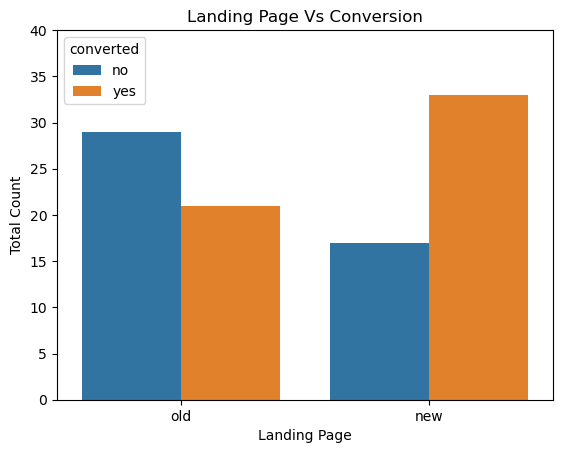

In [39]:
sns.countplot(data = df, hue= 'converted', x = 'landing_page')
plt.title('Landing Page Vs Conversion')
plt.xlabel('Landing Page')
plt.ylabel('Total Count')
plt.ylim(0,40)

### Observation:

- As we can see that new landing_page has better conversion rate.

(0.0, 30.0)

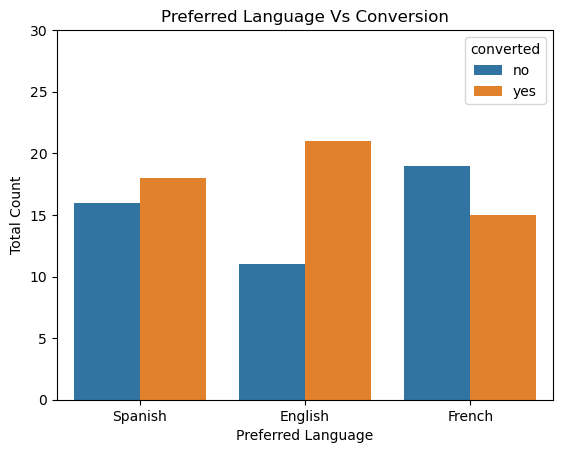

In [40]:
sns.countplot(data = df, x= 'language_preferred', hue = 'converted')
plt.title('Preferred Language Vs Conversion')
plt.xlabel('Preferred Language')
plt.ylabel('Total Count')
plt.ylim(0,30)

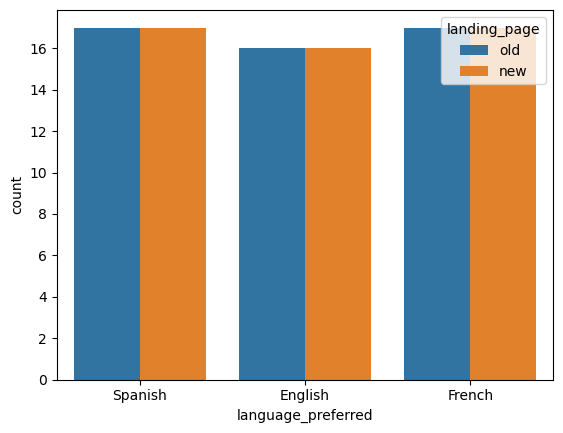

In [41]:
sns.countplot(data = df, x= 'language_preferred', hue = 'landing_page');

### Observation:

1. Data is randomly and independently selected while mainting the equality between new and old landing page value counts.
2. User interaction time is greater for new landing page.
3. Users who prefer interact in english language has shown better conversion rate.

In [42]:
df1.groupby(['language_preferred','converted','landing_page']).sum()

time_spent_on_the_page
language_preferred converted landing_page                        
English            no        new                            33.04
                             old                             8.88
                   yes       new                            73.58
                             old                            62.39
French             no        new                            22.00
                             old                            51.37
                   yes       new                            83.34
                             old                            21.90
Spanish            no        new                            27.96
                             old                            36.88
                   yes       new                            71.24
                             old                            45.20

<Axes: xlabel='language_preferred,converted,landing_page'>

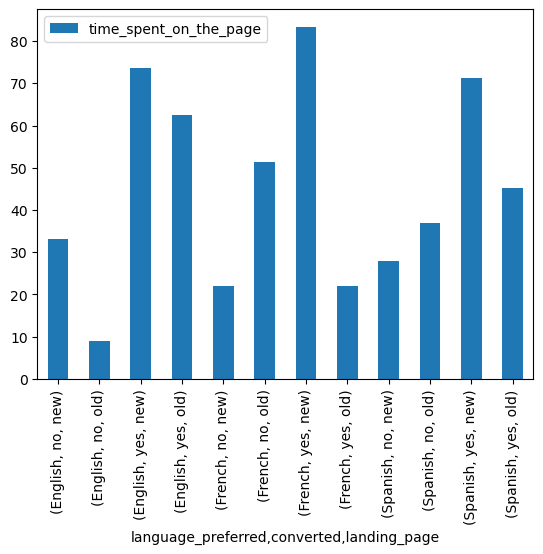

In [43]:
df1.groupby(['language_preferred','converted','landing_page']).sum().plot(kind = 'bar')

### Observation:
- The interaction time is sharply increased for subscribed French language user on new landing page.

## 1. Do the users spend more time on the new landing page than the existing landing page?

In [59]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [60]:
df2 = df.groupby(['landing_page'])['time_spent_on_the_page'].sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4376\2793801979.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['landing_page']).sum().plot(kind = 'bar', color = 'y');


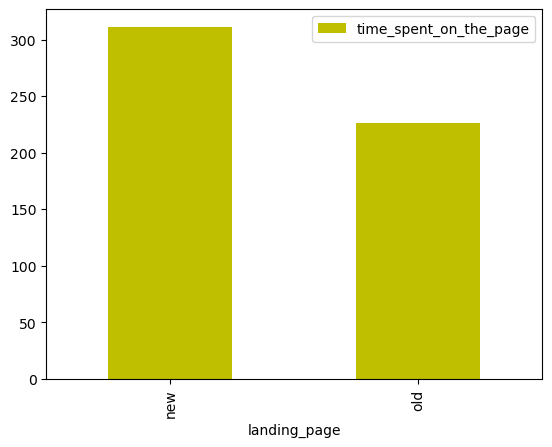

In [61]:
df1.groupby(['landing_page']).sum().plot(kind = 'bar', color = 'y');

### Observation:
- We can easily visualize that the users spend greater time at new landing page.

### Step 1: Define the null and alternate hypotheses
1. Null Hypothesis (H0) : mu_old >= mu_new
2. Alternative Hypothesis (Ha): mu_old < mu_new

Here, I hypothysied that the mean time spent on existing page is greater than new landing page.

### Step 2: Select Appropriate test
Population standard deviation is unknown and there are two samples from the same population. That's why the Two Sample ttest is the appropriate test.

Assumptions:

1. Randomly selected
2. Normally Distributed
3. Independent Variables

### Step 3: Decide the significance 
LevelLevel of Significane = 0.05 (5%)

### Step 4: Collect and prepare data

In [46]:
sample_old = df.loc[df['landing_page'] == 'old','time_spent_on_the_page']
sample_new = df.loc[df['landing_page'] == 'new','time_spent_on_the_page'] 
mu_old = sample_old.mean()
mu_new = sample_new.mean()
mu_old, mu_new

(4.532400000000001, 6.2232)

In [47]:
from scipy.stats import ttest_ind

### Step 5: Calculate the p-value

In [48]:
t_stat, p_value = ttest_ind(sample_old, sample_new, equal_var = False, alternative ='less')
p_value

0.0001392381225166549

In [ ]:
### Step 6: Compare the p-value with α

In [49]:
if p_value < 0.05:
    print(f"We can reject the null hypothesis as p_value = {p_value} which is lesser than 0.05")
else:
    print(f"We fail to reject the null hypothesis as p_value = {p_value} which is greater than 0.05")

We can reject the null hypothesis as p_value = 0.0001392381225166549 which is lesser than 0.05


### Step 7: Draw inference
Observation:

- We can reject the null hypothesis and conjectured that users spend greater time on new landing plateform in comparision to old landing plateform.
A similar approach can be followed to answer the other questions.

### 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Perform Visual Analysis

(0.0, 40.0)

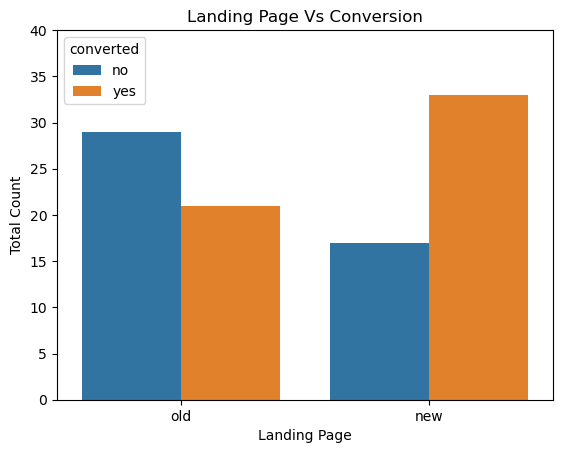

In [50]:
sns.countplot(data = df, hue= 'converted', x = 'landing_page')
plt.title('Landing Page Vs Conversion')
plt.xlabel('Landing Page')
plt.ylabel('Total Count')
plt.ylim(0,40)

In [51]:
conversion_data = df.groupby(['landing_page'])['converted'].value_counts()
new_page_conversion_rate = 33/50
old_page_conversion_rate = 21/50
print(conversion_data);

print("\nThe conversion rate for new page is ",new_page_conversion_rate )
print("The conversion rate for old page is ",old_page_conversion_rate )

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

The conversion rate for new page is  0.66
The conversion rate for old page is  0.42


### Observations:

- From the above bar graph, it is clear that conversion rate is better for new landing page incomparision to old landing page.

### Step 1: Define the null and alternate hypotheses
- Null Hypothesis: H0 mu_conversion_new > mu_conversion_old
- Alternative Hypothesis : Ha mu_conversion_new < mu_conversion_old

Here, I hypothysied that mean conversion rate at new landing page is greater than that of old landing page.

### Step 2: Select Appropriate test
As we are concern about the proportion. So, 2 sample z proportion test is appropriate using here.

Assumptions:

1. Normally Distributed
2. Randomly Selected
3. Independent Random variables

### Step 3: Decide the significance level
Level of significance = 0.05 (5%)

### Step 4: Collect and prepare data

In [65]:
old_sample_count = 50
new_sample_count = 50

In [66]:
df.groupby(['landing_page','converted'])['converted'].value_counts()

landing_page  converted  converted
new           no         no           17
              yes        yes          33
old           no         no           29
              yes        yes          21
Name: converted, dtype: int64

In [67]:
conversion_old = 21
conversion_new = 33

In [68]:
conversion = [conversion_old,conversion_new]
sample_size = [old_sample_count, new_sample_count]

### Step 5: Calculate the p-value

In [69]:
from statsmodels.stats.proportion import proportions_ztest

In [70]:
t_stat, p_value = proportions_ztest(conversion, sample_size, alternative = 'larger')
p_value

0.9919736917959437

### Step 6: Compare the p-value with α

In [72]:
if p_value < 0.05:
    print(f"We can reject the null hypothesis as p_value = {p_value} which is lesser than 0.05")
else:
    print(f"We fail to reject the null hypothesis as p_value = {p_value} which is greater than 0.05")

We fail to reject the null hypothesis as p_value = 0.9919736917959437 which is greater than 0.05


### Step 7: Draw inference
Failed to reject the null hypothesis as p_value is larger than 0.05 So, I can conjecture that coversion rate at new landing page is greater than the old landing page.

### 3. Is the conversion and preferred language are independent or related?
Perform Visual Analysis

(0.0, 30.0)

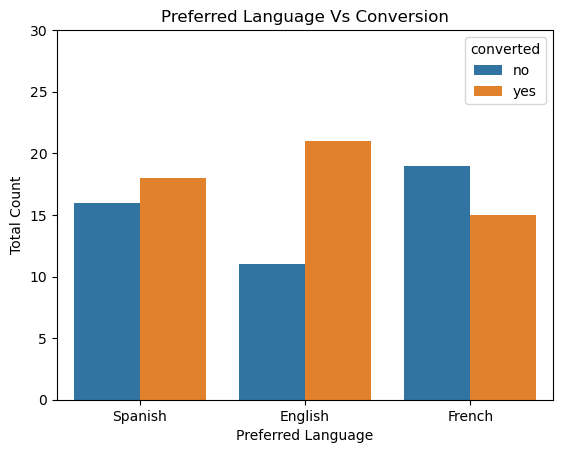

In [75]:
sns.countplot(data = df, x= 'language_preferred', hue = 'converted')
plt.title('Preferred Language Vs Conversion')
plt.xlabel('Preferred Language')
plt.ylabel('Total Count')
plt.ylim(0,30)

### Observation:
- Visually we can say that conversion and preferred language are related

### Step 1: Define the null and alternate hypotheses
- Null hypothesis: H0 : Conversion and preferred language are independent.
- Alternative Hypothesis: Ha : Conversion and preferred language are not independent.

### Step 2: Select Appropriate test
-Chi Square test of independence will be best fit for this situation. Because both are categorical variables.

### Step 3: Decide the significance level
Level of significance = 0.05 (5%)

### Step 4: Collect and prepare data

In [77]:
contingency_table = pd.crosstab(df['converted'],df['language_preferred'], margins = True)
contingency_table

language_preferred,English,French,Spanish,All
converted,,,,
no,11,19,16,46
yes,21,15,18,54
All,32,34,34,100


### Step 5: Calculate the p-value

In [78]:
from scipy.stats import chi2_contingency

In [79]:
chi, p_value, dof, expected = chi2_contingency(contingency_table)
p_value

0.7970832186581233

### Step 6: Compare the p-value with α

In [81]:
if p_value < 0.05:
    print(f"We can reject the null hypothesis as p_value = {p_value} which is lesser than 0.05")
else:
    print(f"We fail to reject the null hypothesis as p_value = {p_value} which is greater than 0.05")

We fail to reject the null hypothesis as p_value = 0.7970832186581233 which is greater than 0.05


### Step 7: Draw inference
- From the above results, I can say that conversion rate and preferred language are independent.

### 4. Is the time spent on the new page same for the different language users?
Perform Visual Analysis

In [84]:
df_total = df1.groupby(['language_preferred']).sum();
df_total

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4376\132451969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_total = df1.groupby(['language_preferred']).sum();


,time_spent_on_the_page
language_preferred,
English,177.89
French,178.61
Spanish,181.28


In [85]:
df_new = df.loc[df['landing_page'] == 'new'].groupby(['language_preferred'])['time_spent_on_the_page'].sum()
df_new

language_preferred
English    106.62
French     105.34
Spanish     99.20
Name: time_spent_on_the_page, dtype: float64

(0.0, 120.0)

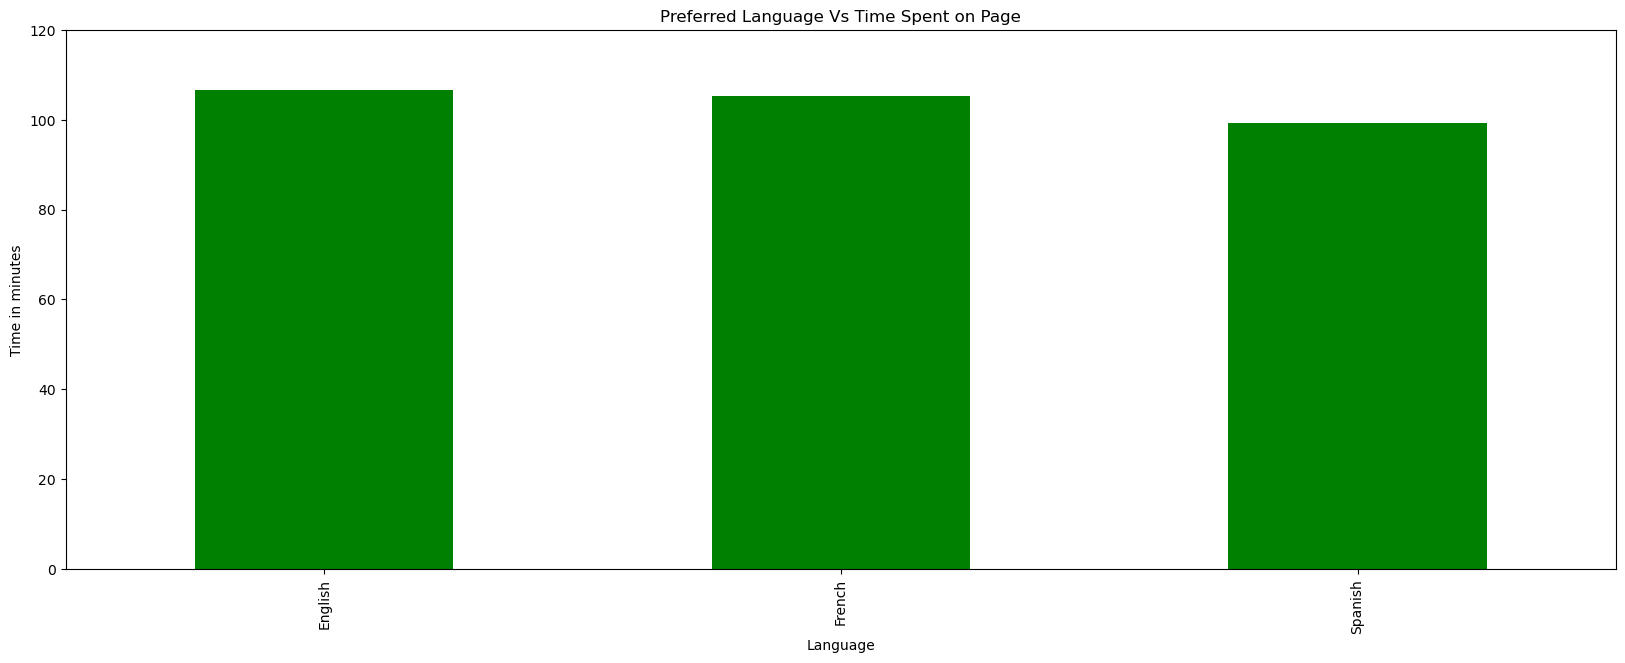

In [87]:
plt.figure(figsize = (20,7))
df_new.plot(kind = 'bar', color = 'g')
plt.title('Preferred Language Vs Time Spent on Page')
plt.ylabel('Time in minutes')
plt.xlabel('Language')
plt.ylim(0,120)

In [88]:
df_old = df.loc[df['landing_page'] == 'old'].groupby(['language_preferred'])['time_spent_on_the_page'].sum()
df_old

language_preferred
English    71.27
French     73.27
Spanish    82.08
Name: time_spent_on_the_page, dtype: float64

(0.0, 12.0)

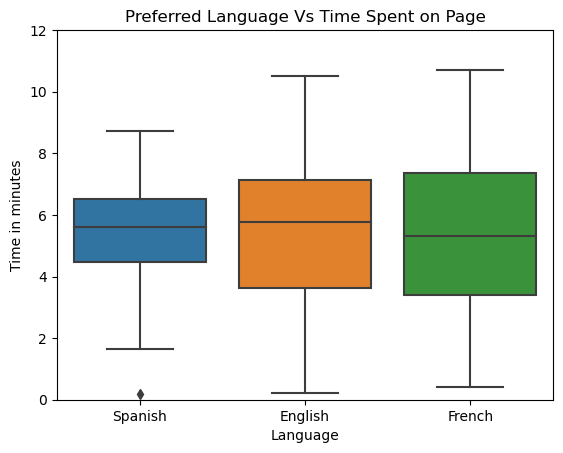

In [89]:
sns.boxplot(data =df, y = 'time_spent_on_the_page' ,x = 'language_preferred')
plt.title('Preferred Language Vs Time Spent on Page')
plt.ylabel('Time in minutes')
plt.xlabel('Language')
plt.ylim(0,12)

### Observation:

- The interaction time is almost similar for all three languages for new landing page.
- The interaction time is better in comparision to old landing page also.
- The average interaction time is almost similar for all three languages.

### Step 1: Define the null and alternate hypotheses
1. Null Hypothesis : mu1 = mu2 =mu3
2. Alternative Hypothesis : at least one is different
3. mu1: Mean time spent for Spanish on new landing page
4. mu2: Mean time spent for English on new landing page
5. mu3: Mean time spent for French on new landing page

### Step 2: Select Appropriate test
ANOVA: Analysis of Variance

This test allow us to compare and draw conjecture for multiple groups

### Step 3: Decide the significance level
Significance Level = 0.05 (5%)

### Step 4: Collect and prepare data

### Assumptions:

- Samples are consist of independent simple random variable.
- The group population is normally distributed
- The group variance have a common variance

As per the information the data provided is randomny sampled. But we need to check for normal distribution and common variance.

In [90]:
# Shapiro Wilks's test for normality check:
# H0: The sample group follows normal distribution
# H1: The sample group not follows normal distribution
# alpha = 0.05

from scipy import stats
w, p_value_wilk = stats.shapiro(df.loc[df['landing_page'] == 'new',['time_spent_on_the_page']])
if p_value_wilk < 0.05:
    print(f"We can reject the null hypothesis as p_value_wilk= {p_value_wilk} which is lesser than 0.05")
else:
    print(f"We fail to reject the null hypothesis as p_value_wilk = {p_value_wilk} which is greater than 0.05")

We fail to reject the null hypothesis as p_value_wilk = 0.8040016293525696 which is greater than 0.05


From above result we can infer that the sample group is normally distributed.

In [91]:
# Levene's test for equality of variance check:
# H0: The samples have equal variance.
# H1: The samples have unequal variance.
# alpha = 0.05

from scipy.stats import levene
stat, p_value_levene = levene(df.loc[(df['landing_page'] == 'new') & (df['language_preferred'] == 'Spanish')]['time_spent_on_the_page'],
                             df.loc[(df['landing_page'] == 'new') & (df['language_preferred'] == 'English')]['time_spent_on_the_page'],
                             df.loc[(df['landing_page'] == 'new') & (df['language_preferred'] == 'French')]['time_spent_on_the_page'] )
if p_value_levene < 0.05:
    print(f"We can reject the null hypothesis as p_value_levene = {p_value_levene} which is lesser than 0.05")
else:
    print(f"We fail to reject the null hypothesis as p_value_levene = {p_value_levene} which is greater than 0.05")

We fail to reject the null hypothesis as p_value_levene = 0.46711357711340173 which is greater than 0.05


From the above result we can infer that the variance is equal and ANOVA is applicable here.

### Step 5: Calculate the p-value

In [92]:
from scipy.stats import f_oneway
test_stat, p_value_anova = f_oneway(df.loc[(df['landing_page'] == 'new') & (df['language_preferred'] == 'Spanish')]['time_spent_on_the_page'],
                             df.loc[(df['landing_page'] == 'new') & (df['language_preferred'] == 'English')]['time_spent_on_the_page'],
                             df.loc[(df['landing_page'] == 'new') & (df['language_preferred'] == 'French')]['time_spent_on_the_page'] )
p_value_anova

0.43204138694325955

### Step 6: Compare the p-value with α

In [93]:
if p_value_anova < 0.05:
    print(f"We can reject the null hypothesis as p_value_anova = {p_value_anova} which is lesser than 0.05")
else:
    print(f"We fail to reject the null hypothesis as p_value_anova = {p_value_anova} which is greater than 0.05")

We fail to reject the null hypothesis as p_value_anova = 0.43204138694325955 which is greater than 0.05


### Step 7: Draw inference
As we have failed to reject the null hypothesis. So, we can infer that all mean interaction time for all three laguages on new landing page is same.

### Conclusion and Business Recommendations
Conclusion
1. The new landing page has better interation capabilities in comparision to old landing page.
2. Although interaction time is almost same for all three languages but conversion rate is better for English.
3. Convertion rate directly depends on the user interation time.
4. Total user subscription count is greater than the contrary part.
5. Conversion and preferred languages are related to each other.
6. At new landing page the mean interaction time is equal for all three languages.

### Recommendations
1. E News Express must continue using new landing page for better interaction and conversion rate.
2. The interaction time on both the landing page is similar for all three languages but conversion rate is higher for English. So, I suggest that company must focus on the quality of content for other two languages to achieve better conversion rate.
3. Company can target and give discounts to users as per their preferred language. (As we know the conversion rate).